<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

Импортируем необходимые библиотеки

In [25]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_curve
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

## Подготовка данных

Прочитаем ДФ и его основные параметры

In [2]:
df = pd.read_csv('C:/Users/FunnyFunFruit/Desktop/Project/Churn.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
df.shape

(10000, 14)

In [5]:
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4738,4739,15644361,Hooper,702,France,Female,40,NaN,103549.24,1,0,0,9712.52,1
9993,9994,15569266,Rahman,644,France,Male,28,7.0,155060.41,1,1,0,29179.52,0
5573,5574,15628893,Power,681,France,Male,29,8.0,0.00,1,1,0,66367.33,0
5025,5026,15780432,Shen,728,France,Male,37,3.0,122689.51,2,0,0,106977.53,1
7458,7459,15800049,Grigoryeva,728,Spain,Female,43,NaN,0.00,1,1,1,120088.17,0


Удалим ненужные столбцы, которые могут запутать модель

In [6]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

Посмотрим на типы данных в столбцах

In [7]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure             float64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

Посмотрим на пропуски в столбцах

In [8]:
df.isna().sum()

CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

Так как доля пропусков от объема ДФ не очень большая, то удалим пропуски

In [9]:
df.dropna(axis=0, inplace=True)
df.reset_index(inplace=True, drop=True)

Используем One-Hot Encoder для замены категориальных столбцов на двоичные категории

In [ ]:
#df = pd.get_dummies(data=df, columns=['Geography', 'Gender'])
#ohe = OneHotEncoder()
#df_enc = pd.DataFrame(ohe.fit_transform(df[['Geography', 'Gender']]).toarray())
#df = df.join(df_enc)

Удалим замененные столбцы и переименуем оставшиеся

In [ ]:
#df.drop(['Geography', 'Gender'], axis=1, inplace=True)
#df.columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
#              'Exited', 'France', 'Germany', 'Spain', 'Female', 'Male']

## Исследование задачи

Построим гистограммы для всех столбцов

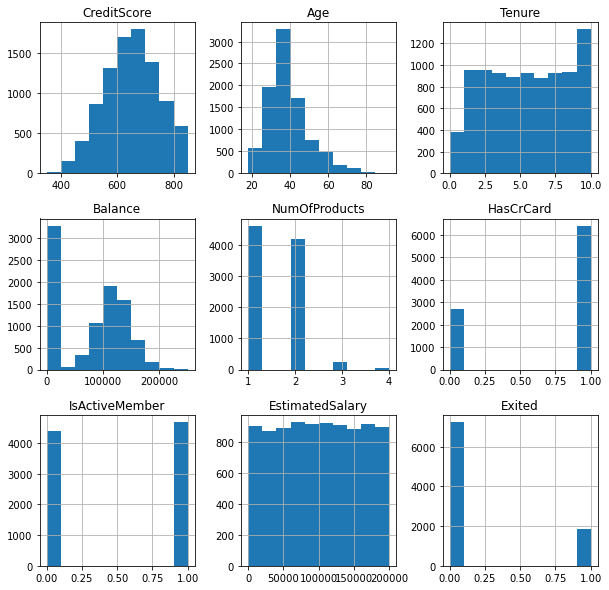

In [10]:
df.hist(figsize=(10,10));

Построим диаграммы зависимостей количества ушедших людей от разных параметров

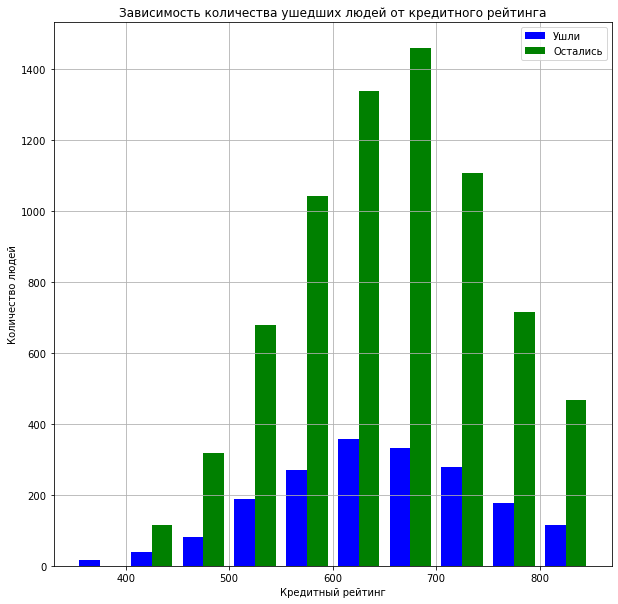

In [11]:
cscore_exited_1 = df[df['Exited'] == 1]['CreditScore']
cscore_exited_0 = df[df['Exited'] == 0]['CreditScore']
plt.figure(figsize=(10,10))
plt.hist([cscore_exited_1, cscore_exited_0], color=['blue', 'green'], label=['Ушли', 'Остались'])
plt.title('Зависимость количества ушедших людей от кредитного рейтинга');
plt.xlabel('Кредитный рейтинг');
plt.ylabel('Количество людей');
plt.legend();
plt.grid()

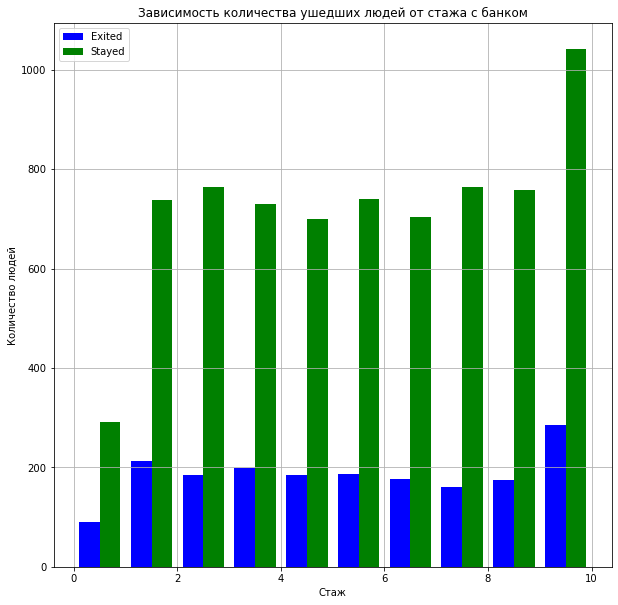

In [12]:
tenure_exited_1 = df[df['Exited'] == 1]['Tenure']
tenure_exited_0 = df[df['Exited'] == 0]['Tenure']
plt.figure(figsize=(10,10))
plt.hist([tenure_exited_1, tenure_exited_0], color=['blue', 'green'], label=['Exited', 'Stayed']);
plt.legend();
plt.xlabel('Стаж');
plt.ylabel('Количество людей');
plt.title('Зависимость количества ушедших людей от стажа с банком');
plt.grid()

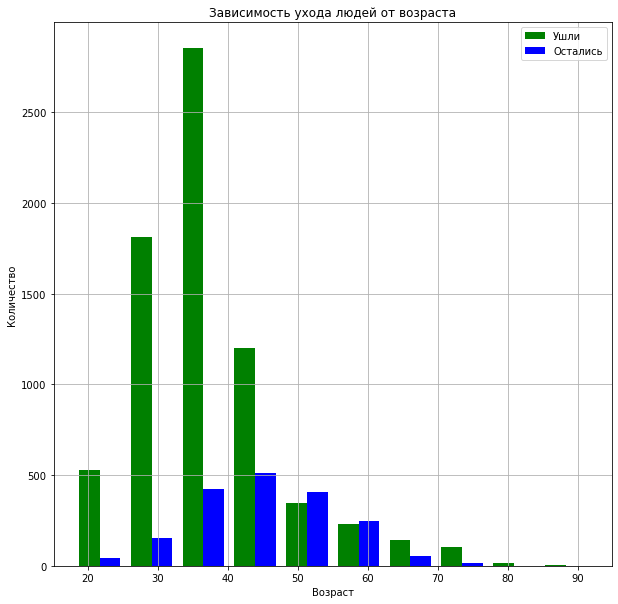

In [13]:
age_exited_0 = df[df['Exited'] == 0]['Age']
age_exited_1 = df[df['Exited'] == 1]['Age']
plt.figure(figsize=(10,10))
plt.hist([age_exited_0, age_exited_1], color=['green', 'blue'], label=['Ушли', 'Остались']);
plt.title('Зависимость ухода людей от возраста');
plt.xlabel('Возраст');
plt.ylabel('Количество');
plt.legend()
plt.grid()

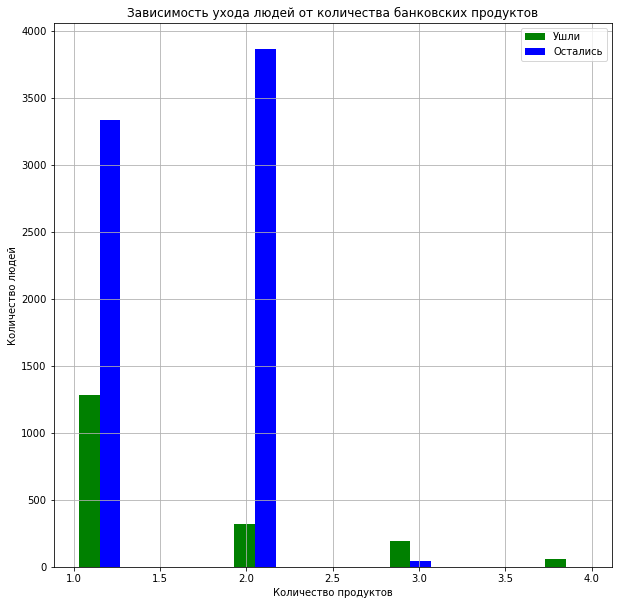

In [14]:
prod_exited_1 = df[df['Exited'] == 1]['NumOfProducts']
prod_exited_0 = df[df['Exited'] == 0]['NumOfProducts']
plt.figure(figsize=(10,10));
plt.hist([prod_exited_1, prod_exited_0], color=['green', 'blue'], label=['Ушли', 'Остались']);
plt.title('Зависимость ухода людей от количества банковских продуктов');
plt.xlabel('Количество продуктов');
plt.ylabel('Количество людей');
plt.grid()
plt.legend();

In [15]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

Разделим данные на тренировочную, валидационную и тестовую выборки

In [16]:
features = df.drop('Exited', axis=1)
target = df['Exited']

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.4, random_state=1)
features_valid, features_test, target_valid, target_test = train_test_split(features_test, target_test, test_size=0.5, 
                                                                            random_state=1)
print(features_train.shape)
print(features_test.shape)
print(target_train.shape)
print(target_test.shape)

(5454, 10)
(1819, 10)
(5454,)
(1819,)


Обучаем OHE и StandartScaler на тестовой выборке

In [17]:
ohe = OneHotEncoder(handle_unknown='ignore', drop='first', sparse=False)
ohe_features = features_train.select_dtypes(include='object').columns.to_list()
ohe.fit(features_train[ohe_features])
features_train[ohe.get_feature_names_out()] = ohe.transform(features_train[ohe_features])
features_train = features_train.drop(ohe_features, axis=1)

scaler = StandardScaler()
num_features = features_train.select_dtypes(exclude='object').columns.to_list()
features_train[num_features] = scaler.fit_transform(features_train[num_features])

features_train.sample(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
5389,1.198808,-0.850673,-0.340464,0.817795,0.811585,0.642614,0.976800,-1.257331,1.691924,-0.565634,0.907789
1622,2.072867,0.003935,1.741641,-1.238754,0.811585,0.642614,0.976800,0.737029,-0.591043,1.767927,-1.101578
4541,1.115564,-0.375891,0.006554,-1.238754,0.811585,-1.556143,-1.023751,-0.008375,-0.591043,1.767927,-1.101578
4063,0.522452,0.288804,0.353571,0.148002,-0.904733,0.642614,-1.023751,0.917198,-0.591043,-0.565634,-1.101578
6031,0.928265,-0.280934,-0.340464,1.535500,-0.904733,0.642614,0.976800,-0.250968,-0.591043,-0.565634,0.907789


Применим масштабирование и OHE к остальным выборкам

In [18]:
features_valid[ohe.get_feature_names_out()] = ohe.transform(features_valid[ohe_features])
features_valid = features_valid.drop(ohe_features, axis=1)
features_valid[num_features] = scaler.transform(features_valid[num_features])

In [34]:
features_test[ohe.get_feature_names_out()] = ohe.transform(features_test[ohe_features])
features_test = features_test.drop(ohe_features, axis=1)
features_test[num_features] = scaler.transform(features_test[num_features])

Обучим модель логистической регрессии с разлтичным решателем и посмотрим на F1 метрику

In [19]:
model = LogisticRegression(random_state=1, solver='lbfgs')
model.fit(features_train, target_train)
predictions = model.predict(features_valid)
print(f1_score(target_valid, predictions))

0.2594142259414226


In [20]:
model = LogisticRegression(random_state=1, solver='newton-cg')
model.fit(features_train, target_train)
predictions = model.predict(features_valid)
print(f1_score(target_valid, predictions))

0.2594142259414226


Обучим модель случайного леса и подберем гиперпараметры с помощью GridSearchCV

In [21]:
f1_score_best = 0
for est in range(10, 51, 10):
    for depth in range(1, 10):
        model = RandomForestClassifier(random_state=1, n_estimators=est, max_depth=depth)
        model.fit(features_train, target_train)
        predictions = model.predict(features_valid)
        if f1_score(target_valid, predictions) > f1_score_best:
            best_model = model
            best_n_est = est
            best_depth = depth
            f1_score_best = f1_score(target_valid, predictions)
print('n_est:', best_n_est, 'depth', best_depth, 'f1:', f1_score_best)

n_est: 20 depth 9 f1: 0.5303867403314917


Лучшая F1 метрика на данном этапе составляет 0,53 у модели случайного леса, гиперпараметры были подобраны с помощью двойного цикла перерборки. Для дальнейшего улучшения метрики будем использовать методы upsampling и downsampling, а также гиперпараметр class_weight. Они заключаются в намеренном увеличении или уменьшении выборки соответсвенно.

## Борьба с дисбалансом

Используем метод Downsampling

In [23]:
undersample = RandomUnderSampler(sampling_strategy='majority')
features_train_under, target_train_under = undersample.fit_resample(features_train, target_train)

In [24]:
f1_score_best = 0
for est in range(10, 51, 10):
    for depth in range(1, 10):
        model = RandomForestClassifier(random_state=1, n_estimators=est, max_depth=depth)
        model.fit(features_train_under, target_train_under)
        predictions = model.predict(features_valid)
        if f1_score(target_valid, predictions) > f1_score_best:
            best_model = model
            best_n_est = est
            best_depth = depth
            f1_score_best = f1_score(target_valid, predictions)
print('n_est:', best_n_est, 'depth', best_depth, 'f1:', f1_score_best)

n_est: 10 depth 5 f1: 0.5682074408117249


После применения метода Undersampling f1 метрика выросла до 0.568

In [28]:
oversampler = SMOTE(random_state=1)
features_train_over, target_train_over = oversampler.fit_resample(features_train, target_train)

In [29]:
f1_score_best = 0
for est in range(10, 51, 10):
    for depth in range(1, 10):
        model = RandomForestClassifier(random_state=1, n_estimators=est, max_depth=depth)
        model.fit(features_train_over, target_train_over)
        predictions = model.predict(features_valid)
        if f1_score(target_valid, predictions) > f1_score_best:
            best_model = model
            best_n_est = est
            best_depth = depth
            f1_score_best = f1_score(target_valid, predictions)
print('n_est:', best_n_est, 'depth', best_depth, 'f1:', f1_score_best)

n_est: 50 depth 9 f1: 0.5974999999999999


После применения метода Oversampling f1 метрика выросла до 0.597

Попробуем добавить гиперпараметр class_weight к модели с наиболее высокой метрикой f1

In [31]:
f1_score_best = 0
for est in range(10, 51, 10):
    for depth in range(1, 10):
        model = RandomForestClassifier(random_state=1, n_estimators=est, max_depth=depth, class_weight='balanced')
        model.fit(features_train_under, target_train_under)
        predictions = model.predict(features_valid)
        if f1_score(target_valid, predictions) > f1_score_best:
            best_model = model
            best_n_est = est
            best_depth = depth
            f1_score_best = f1_score(target_valid, predictions)
print('n_est:', best_n_est, 'depth', best_depth, 'f1:', f1_score_best)

n_est: 10 depth 5 f1: 0.5682074408117249


f1 метрика понизилась до 0,568

In [32]:
f1_score_best = 0
for est in range(10, 51, 10):
    for depth in range(1, 10):
        model = RandomForestClassifier(random_state=1, n_estimators=est, max_depth=depth, class_weight='balanced')
        model.fit(features_train, target_train)
        predictions = model.predict(features_valid)
        if f1_score(target_valid, predictions) > f1_score_best:
            best_model = model
            best_n_est = est
            best_depth = depth
            f1_score_best = f1_score(target_valid, predictions)
print('n_est:', best_n_est, 'depth', best_depth, 'f1:', f1_score_best)

n_est: 50 depth 8 f1: 0.6129870129870131


При добавлении гиперпараметра class_weight на необработанную выборку f1 метрика составила 0,61, что является лучшим значением

## Тестирование модели

In [35]:
predictions_test = best_model.predict(features_test)
print(classification_report(target_test, predictions_test))

              precision    recall  f1-score   support

           0       0.91      0.86      0.88      1441
           1       0.56      0.67      0.61       378

    accuracy                           0.82      1819
   macro avg       0.73      0.76      0.74      1819
weighted avg       0.83      0.82      0.83      1819



При проверке на тестовой выборке метрика F1 составила 0,61, что является выше порогового значения, а значит данная модель нам подходит

В данном проекте была выбрана оптимальная модель для выполнения задачи классификации клиентов банка и предсказанию их ухода. В результате исследования наиболее точной по метрике F1 оказалась модель Случайного леса, которая и была выбрана для дальнейшей работы, в ходе которой была проведена работа над дисбалансом. Были опробованы два метода борьбы с дисбалансом, upsampling и downsampling. Модель с наибольшей метрикой F1 оказалась модель случайного леса с гиперпараметрами max_depth=8, n_estimators=50. При борьбе с дисбалансом наиболее хорошо себя показал гиперпараметр class_weight. Метрика данной модели на тестовой выборке составила 0,61